In [225]:
import numpy as np                  
import pandas as pd                
import matplotlib.pyplot as plt    
import seaborn as sns
import mysql.connector
from mysql.connector import Error

In [226]:
def cargar_tablas_a_dataframes(host, database, user, password):
    """
    Se conecta a una base de datos MySQL y carga todas las tablas como DataFrames de Pandas
    con nombres din√°micos en el entorno global (ej. df_nombreTabla).
    """
    try:
        connection = mysql.connector.connect(
            host=host,
            database=database,
            user=user,
            password=password
        )

        if connection.is_connected():
            cursor = connection.cursor()  # Creaci√≥n de un cursor para ejecutar consultas SQL
            cursor.execute("SHOW TABLES")  # Se ejecuta la consulta "SHOW TABLES" para listar las tablas

            tablas = [tabla[0] for tabla in cursor.fetchall()]  # Se obtienen los nombres de las tablas

            for tabla in tablas:
                cursor.execute(f"SELECT * FROM {tabla}")  # Se extraen los datos de cada tabla
                columnas = [columna[0] for columna in cursor.description]  # Nombres de columnas
                globals()[f'df_{tabla}'] = pd.DataFrame(cursor.fetchall(), columns=columnas)  # DataFrame din√°mico
                print(f'df_{tabla}')  # Mostrar el nombre del DataFrame creado

    except Error as e:
        print("Error while connecting to MySQL:", e)  # Manejo de errores

    finally:
        if 'connection' in locals() and connection.is_connected():
            cursor.close()  # Cierra el cursor
            connection.close()  # Cierra la conexi√≥n
            print("MySQL connection is closed")  # Mensaje de cierre

In [227]:
cargar_tablas_a_dataframes('212.227.90.6', 'Equip_11', 'Equipo11', 'E1q2u3i4p5o11')

df_RRHH
df_RRHH_16062025
MySQL connection is closed


In [228]:
# Muestra todas las columnas
pd.set_option('display.max_columns', None)

# Opcional: muestra todo el ancho (evita recortes por pantalla estrecha)
pd.set_option('display.width', None)

# Opcional: ajusta el ancho m√°ximo de cada columna si es muy largo
pd.set_option('display.max_colwidth', None)

In [229]:
df_RRHH_16062025.columns

Index(['ID', 'Reason_absence', 'Month_absence', 'Day_week', 'Seasons',
       'Transportation_expense', 'Distance_Residence_Work', 'Service_time',
       'Age', 'Work_load_Average_day', 'Hit_target', 'Disciplinary_failure',
       'Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight',
       'Height', 'Body_mass_index', 'Absenteeism_hours'],
      dtype='object')

In [230]:
df_RRHH.head(15)

ID  Reason_absence  Month_absence  Day_week  Seasons  \
0   14              11             11         2        2   
1   36              13              4         4        4   
2    9               6              7         3        1   
3   28               9              7         3        1   
4    9              12              3         3        4   
5   11              19              3         2        4   
6   36              13              6         4        1   
7   14              18             12         3        3   
8   13              13              7         2        1   
9   34              19             12         3        3   
10  22               1             10         4        2   
11  26              19              5         6        4   
12  34              19             12         3        3   
13  20              19              4         6        4   
14  14              10              5         2        4   

    Transportation_expense  Distance_Residence_Work  Service_time  Age  \
0                      155                       12            14   34   
1                      118                       13            18   50   
2                      228                       14            16   58   
3                      225                       26             9   28   
4                      228                       14            16   58   
5                      289                       36            13   33   
6                      118                       13            18   50   
7                      155                       12            14   34   
8                      369                       17            12   31   
9                      118                       10            10   37   
10                     179                       26             9   30   
11                     300                       26            13   43   
12                     118                       10            10   37   
13                     260                       50            11   36   
14                     155                       12            14   34   

   Work_load_Average_day  Hit_target Disciplinary_failure Education  Son  \
0                284,031          97                    0         1    2   
1                239,409          98                    0         1    1   
2                264,604          93                    0         1    2   
3                230,290          92                    0         1    1   
4                222,196          99                    0         1    2   
5                222,196          99                    0         1    2   
6                377,550          94                    0         1    1   
7                280,549          98                    0         1    2   
8                264,604          93                    0         1    3   
9                261,306          97                    0         1    0   
10               265,017          88                    0         3    0   
11               237,656          99                    0         1    2   
12               261,306          97                    0         1    0   
13               326,452          96                    0         1    4   
14               237,656          99                    0         1    2   

   Social_drinker Social_smoker Pet  Weight  Height  Body_mass_index  \
0               1             0   0      95     196               25   
1               1             0   0      98     178               31   
2               0             0   1      65     172               22   
3               0             0   2      69     169               24   
4               0             0   1      65     172               22   
5               1             0   1      90     172               30   
6               1             0   0      98     178               31   
7               1             0   0      95     196              

In [231]:
df_RRHH_16062025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       840 non-null    int64 
 1   Reason_absence           840 non-null    int64 
 2   Month_absence            840 non-null    int64 
 3   Day_week                 840 non-null    int64 
 4   Seasons                  840 non-null    int64 
 5   Transportation_expense   840 non-null    int64 
 6   Distance_Residence_Work  840 non-null    int64 
 7   Service_time             840 non-null    int64 
 8   Age                      840 non-null    int64 
 9   Work_load_Average_day    840 non-null    object
 10  Hit_target               840 non-null    int64 
 11  Disciplinary_failure     840 non-null    object
 12  Education                840 non-null    object
 13  Son                      840 non-null    int64 
 14  Social_drinker           840 non-null    o

In [232]:
desempe√±o_profesional = df_RRHH_16062025[['ID', 'Hit_target', 'Disciplinary_failure', 'Service_time','Work_load_Average_day', 'Age', 'Son', 'Education','Social_drinker', 'Social_smoker', 'Distance_Residence_Work']].drop_duplicates(subset='ID').reset_index(drop=True)
desempe√±o_profesional.head(10)

ID  Hit_target Disciplinary_failure  Service_time Work_load_Average_day  \
0   1          98                    1            14               244.387   
1   2          96                    1            12               326.452   
2   3          95                    1            18               253.957   
3   4          95                    0            13               271.219   
4   5          81                    1            13               294.217   
5   6          97                    0            13               239.554   
6   7          92                    1            14               378.884   
7   8          95                    0            14               271.219   
8   9          91                    0            16               284.853   
9  10          99                    0             3               237.656   

   Age  Son Education Social_drinker Social_smoker  Distance_Residence_Work  
0   37    1         3              0             0                       11  
1   48    1         1              0             1                       29  
2   38    0         1              1             0                       51  
3   40    1         1              1             0                       14  
4   43    1         1              1             0                       20  
5   33    2         1              0             0                       29  
6   39    2         1              1             1                        5  
7   39    2         1              1             0                       35  
8   58    2         1              0             0                       14  
9   28    1         1              1             0                       52

In [233]:
desempe√±o_profesional


ID  Hit_target Disciplinary_failure  Service_time Work_load_Average_day  \
0      1          98                    1            14               244.387   
1      2          96                    1            12               326.452   
2      3          95                    1            18               253.957   
3      4          95                    0            13               271.219   
4      5          81                    1            13               294.217   
..   ...         ...                  ...           ...                   ...   
131  132          94                    0            14               377.550   
132  133          96                    0            14               313.532   
133  134          88                    1            18               265.017   
134  135          97                    0             9               264.249   
135  136          93                    0            16               249.797   

     Age  Son Education Social_drinker Social_smoker  Distance_Residence_Work  
0     37    1         3              0             0                       11  
1     48    1         1              0             1                       29  
2     38    0         1              1             0                       51  
3     40    1         1              1             0                       14  
4     43    1         1              1             0                       20  
..   ...  ...       ...            ...           ...                      ...  
131   37    1         3              0             0                       11  
132   34    2         1              1             0                       12  
133   50    1         1              1             0                       13  
134   28    1         1              0             0                       26  
135   41    0         1              1             0                       25  

[136 rows x 11 columns]

total de empleados 136 - KPI - presentaci√≥n

* Cambio de tipo de datos

In [234]:
# Asegura que los valores de 'Education' sean enteros
desempe√±o_profesional['Education'] = pd.to_numeric(desempe√±o_profesional['Education'], errors='coerce')
desempe√±o_profesional['Education'] = desempe√±o_profesional['Education'].astype(int)

# Asegura que los valores de '' sean enteros
desempe√±o_profesional['Work_load_Average_day'] = pd.to_numeric(desempe√±o_profesional['Work_load_Average_day'], errors='coerce')
desempe√±o_profesional['Work_load_Average_day'] = desempe√±o_profesional['Work_load_Average_day'].astype(int)

desempe√±o_profesional['Social_drinker'] = pd.to_numeric(desempe√±o_profesional['Social_drinker'], errors='coerce')
desempe√±o_profesional['Social_drinker'] = desempe√±o_profesional['Social_drinker'].astype(int)

desempe√±o_profesional['Social_smoker'] = pd.to_numeric(desempe√±o_profesional['Social_smoker'], errors='coerce')
desempe√±o_profesional['Social_smoker'] = desempe√±o_profesional['Social_smoker'].astype(int)

desempe√±o_profesional['Disciplinary_failure'] = pd.to_numeric(desempe√±o_profesional['Disciplinary_failure'], errors='coerce')
desempe√±o_profesional['Disciplinary_failure'] = desempe√±o_profesional['Disciplinary_failure'].astype(int)

desempe√±o_profesional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ID                       136 non-null    int64
 1   Hit_target               136 non-null    int64
 2   Disciplinary_failure     136 non-null    int64
 3   Service_time             136 non-null    int64
 4   Work_load_Average_day    136 non-null    int64
 5   Age                      136 non-null    int64
 6   Son                      136 non-null    int64
 7   Education                136 non-null    int64
 8   Social_drinker           136 non-null    int64
 9   Social_smoker            136 non-null    int64
 10  Distance_Residence_Work  136 non-null    int64
dtypes: int64(11)
memory usage: 11.8 KB


In [235]:
desempe√±o_profesional.describe()

ID  Hit_target  Disciplinary_failure  Service_time  \
count  136.000000  136.000000            136.000000    136.000000   
mean    68.500000   94.352941              0.161765     12.095588   
std     39.403892    4.167830              0.369596      4.406861   
min      1.000000   81.000000              0.000000      1.000000   
25%     34.750000   92.000000              0.000000      9.000000   
50%     68.500000   95.000000              0.000000     12.000000   
75%    102.250000   97.000000              0.000000     14.000000   
max    136.000000  100.000000              1.000000     29.000000   

       Work_load_Average_day         Age         Son   Education  \
count             136.000000  136.000000  136.000000  136.000000   
mean              277.720588   36.279412    1.095588    1.257353   
std                35.156305    6.992791    1.046183    0.632412   
min               222.000000   27.000000    0.000000    1.000000   
25%               251.000000   30.750000    0.000000    1.000000   
50%               266.500000   36.000000    1.000000    1.000000   
75%               294.000000   40.000000    2.000000    1.000000   
max               378.000000   58.000000    4.000000    3.000000   

       Social_drinker  Social_smoker  Distance_Residence_Work  
count      136.000000     136.000000               136.000000  
mean         0.588235       0.066176                29.742647  
std          0.493972       0.249509                14.229337  
min          0.000000       0.000000                 5.000000  
25%          0.000000       0.000000                17.000000  
50%          1.000000       0.000000                26.000000  
75%          1.000000       0.000000                42.000000  
max          1.000000       1.000000                52.000000

El empleado con mayor tiempo de servicio (29 a√±os) tiene 49 a√±os, entonces el tiempo de servicio est√° en a√±os.

In [236]:
# Muestra la columna 'Age' donde 'Service_time' es 29
edad = desempe√±o_profesional.loc[desempe√±o_profesional['Service_time'] == 29, 'Age']
print(edad)

31    49
Name: Age, dtype: int64


In [264]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(desempe√±o_profesional['Age'], kde=True, ax=axs[0])
axs[0].set_title("Distribuci√≥n de Edad")


sns.histplot(
    desempe√±o_profesional['Son'],
    kde=True,
    ax=axs[1],
    bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]
)
axs[1].set_title("Distribuci√≥n de Hijos")
axs[1].set_xticks([0, 1, 2, 3, 4])
axs[1].set_xlim(-0.5, 4.5)
plt.suptitle("Distribuciones de Edad e Hijos en el Dataset de RRHH")

plt.tight_layout()
plt.show()

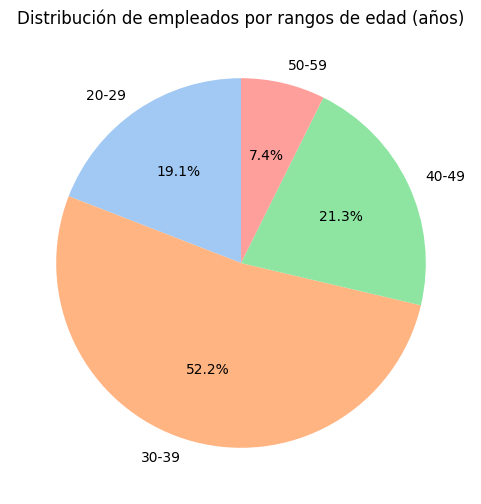

In [266]:
age_bins = [20, 30, 40, 50, 60] 
age_labels = ['20-29', '30-39', '40-49', '50-59']
desempe√±o_profesional['Age_group'] = pd.cut(desempe√±o_profesional['Age'], bins=age_bins, labels=age_labels, right=False)

age_counts = desempe√±o_profesional['Age_group'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(
    age_counts,
    labels=age_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")[0:len(age_labels)]
)
plt.title("Distribuci√≥n de empleados por rangos de edad (a√±os)")
plt.show()

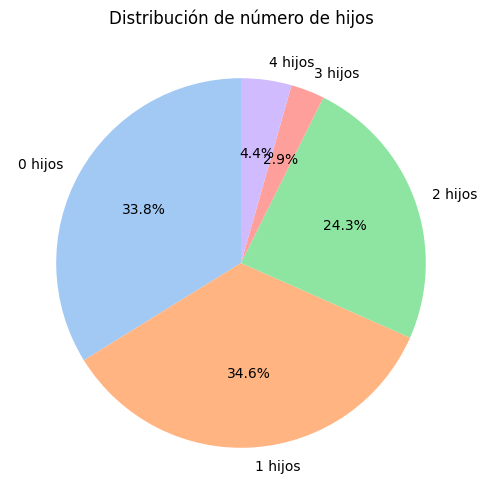

In [267]:
son_counts = desempe√±o_profesional['Son'].value_counts().sort_index()
labels = [f'{i} hijos' for i in son_counts.index]

plt.figure(figsize=(6, 6))
plt.pie(
    son_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")[0:len(son_counts)]
)
plt.title("Distribuci√≥n de n√∫mero de hijos")
plt.show()

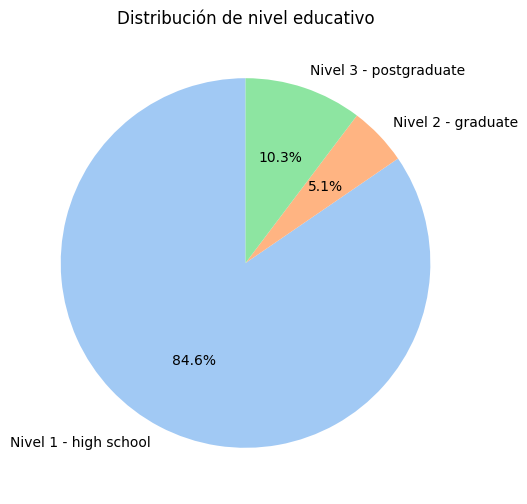

In [269]:
education_counts = desempe√±o_profesional['Education'].value_counts().sort_index()
labels = ['Nivel 1 - high school', 'Nivel 2 - graduate', 'Nivel 3 - postgraduate']  # Ajusta los nombres si tienes descripciones

plt.figure(figsize=(6, 6))
plt.pie(
    education_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")[0:3]
)
plt.title("Distribuci√≥n de nivel educativo")
plt.show()

## Regresi√≥n Lineal

In [ ]:
# Modelado y evaluaci√≥n
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# An√°lisis estad√≠stico detallado
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# SELECCI√ìN DE VARIABLES (X) Y TARGET (y)

X = desempe√±o_profesional[['Age', 'Son', 'Social_drinker', 'Social_smoker', 'Education','Distance_Residence_Work', 'Disciplinary_failure']]
y = desempe√±o_profesional['Hit_target']

# Eliminar valores faltantes
X = X.dropna()
y = y.loc[X.index]

# DIVIDIR EN TRAIN / TEST

lr = LinearRegression()
lr.fit(X_train, y_train)

# AN√ÅLISIS ESTAD√çSTICO CON STATSMODELS
#    (coeficientes, p‚Äëvalues, R¬≤ ajustado, etc.)
# ---------------------------------------------
X_sm = sm.add_constant(X)  # agrega intercepto
model = sm.OLS(y, X_sm).fit()
display(model.summary())

# MULTICOLINEALIDAD (VIF)
# ---------------------------------------------
vif_df = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i)
            for i in range(X.shape[1])]
})
display(vif_df)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Hit_target   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     2.292
Date:                Thu, 26 Jun 2025   Prob (F-statistic):             0.0312
Time:                        07:57:35   Log-Likelihood:                -378.57
No. Observations:                 136   AIC:                             773.1
Df Residuals:                     128   BIC:                             796.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      95.6343      2.684     35.630      0.000      90.323     100.945
Age                         0.0108      0.053      0.204      0.839      -0.094       0.116
Son                         0.3867      0.357      1.083      0.281      -0.320       1.093
Social_drinker             -1.4395      0.820     -1.756      0.081      -3.061       0.182
Social_smoker               0.8457      1.450      0.583      0.561      -2.023       3.715
Education                  -0.1445      0.636     -0.227      0.821      -1.404       1.115
Distance_Residence_Work    -0.0206      0.027     -0.766      0.445      -0.074       0.033
Disciplinary_failure       -3.1618      0.971     -3.255      0.001      -5.084      -1.240
==============================================================================
Omnibus:                       28.846   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.973
Skew:                          -1.099   Prob(JB):                     7.68e-10
Kurtosis:                       4.606   Cond. No.                         377.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Variable       VIF
0                      Age  9.355209
1                      Son  2.298527
2           Social_drinker  3.270431
3            Social_smoker  1.160688
4                Education  4.304549
5  Distance_Residence_Work  4.960356
6     Disciplinary_failure  1.270388

## Distribucion de Hit_target por Disciplinary_failure (variable numerica y variable binaria) 
 
‚úÖ Grupo Disciplinary_failure = 0:
Tiene una forma m√°s asim√©trica a la izquierda (ligera), pero aproximadamente campaniforme.

La curva de densidad muestra un pico claro, lo cual es t√≠pico de una distribuci√≥n normal con poco sesgo.

Visualmente, podr√≠a cumplir con normalidad aproximada.

‚ùå Grupo Disciplinary_failure = 1:
La distribuci√≥n es plana y dispersa, con pocos datos (la curva es casi uniforme).

Esto indica que los valores est√°n m√°s repartidos y no siguen una forma normal.

üß† Conclusi√≥n (hasta aqu√≠):
üîπ No puedes asumir normalidad para ambos grupos.

‚û°Ô∏è Por lo tanto, lo correcto estad√≠sticamente es usar una prueba no param√©trica, es decir:

‚úÖ Usa: Mann-Whitney U test
Este test compara las distribuciones de Hit_target entre los grupos con y sin fallos disciplinarios, sin asumir normalidad.

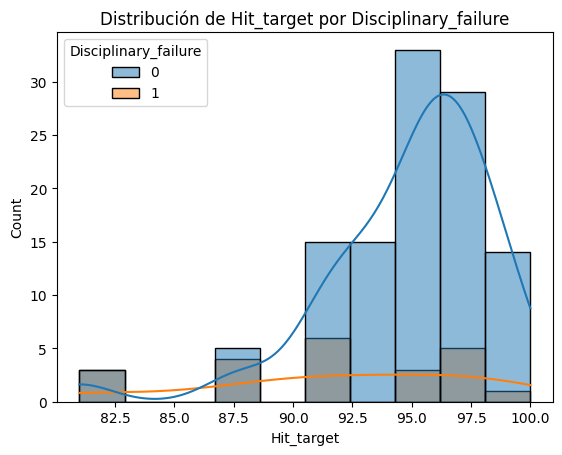

In [239]:
import scipy.stats as stats

# Histograma
sns.histplot(data=desempe√±o_profesional, x="Hit_target", hue="Disciplinary_failure", kde=True)
plt.title("Distribuci√≥n de Hit_target por Disciplinary_failure")
plt.show()


Test de normalidad formal
‚úÖ Shapiro-Wilk test (recomendado si tienes <5000 observaciones):

Si p > 0.05 ‚Üí no se rechaza la normalidad ‚Üí puedes usar t-test.

Si p ‚â§ 0.05 ‚Üí los datos no son normales ‚Üí mejor usar Mann-Whitney U.

In [240]:
from scipy.stats import shapiro

for group in [0, 1]:
    data = desempe√±o_profesional[desempe√±o_profesional['Disciplinary_failure'] == group]['Hit_target']
    stat, p = shapiro(data)
    print(f"Grupo {group} - Shapiro-Wilk p-value: {p:.4f}")


Grupo 0 - Shapiro-Wilk p-value: 0.0000
Grupo 1 - Shapiro-Wilk p-value: 0.0160


## Mann-Whitney U test
Este test compara las distribuciones de Hit_target entre los grupos con y sin fallos disciplinarios, sin asumir normalidad.

Como p-value = 0.0369 < 0.05, se rechaza la hip√≥tesis nula de que ambos grupos (Disciplinary_failure = 0 y 1) tienen distribuciones iguales de Hit_target.
Hay una diferencia estad√≠sticamente significativa en el desempe√±o (Hit_target) entre los empleados con y sin fallos disciplinarios.
Y dado que el gr√°fico mostraba que quienes no tienen fallos disciplinarios tienden a tener mayores valores de Hit_target, podemos concluir: 
## Los empleados que no tienen fallos disciplinarios tienden a tener un mejor desempe√±o (mayor Hit_target).

Prueba mannwhitneyu: U = 1605.50, p-value = 0.0369


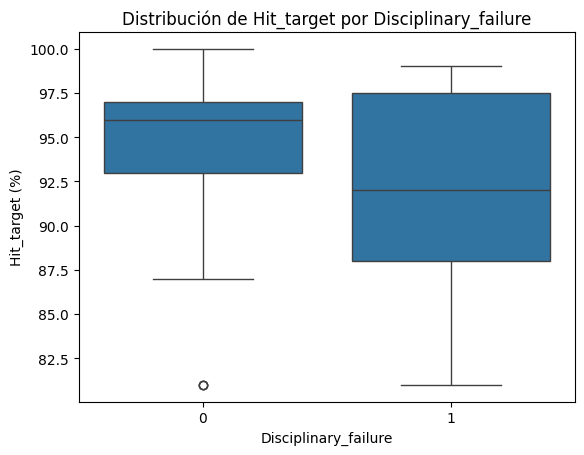

In [273]:
from scipy.stats import mannwhitneyu

grupo_0 = desempe√±o_profesional[desempe√±o_profesional['Disciplinary_failure'] == 0]['Hit_target']
grupo_1 = desempe√±o_profesional[desempe√±o_profesional['Disciplinary_failure'] == 1]['Hit_target']

stat, p = mannwhitneyu(grupo_0, grupo_1, alternative='two-sided')
print(f"Prueba mannwhitneyu: U = {stat:.2f}, p-value = {p:.4f}")

# Visualizaci√≥n de la distribuci√≥n de Hit_target por Disciplinary_failure
sns.boxplot(x='Disciplinary_failure', y='Hit_target', data=desempe√±o_profesional)
plt.title("Distribuci√≥n de Hit_target por Disciplinary_failure")
plt.xlabel("Disciplinary_failure")
plt.ylabel("Hit_target (%)")
plt.show()


In [274]:
# Encuentra el valor at√≠pico en Hit_target para empleados sin fallas disciplinarias (Disciplinary_failure = 0)
q1 = desempe√±o_profesional.loc[desempe√±o_profesional['Disciplinary_failure'] == 0, 'Hit_target'].quantile(0.25)
q3 = desempe√±o_profesional.loc[desempe√±o_profesional['Disciplinary_failure'] == 0, 'Hit_target'].quantile(0.75)
iqr = q3 - q1

# Limites para outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtra el/los outlier(s)
outliers = desempe√±o_profesional[
    (desempe√±o_profesional['Disciplinary_failure'] == 0) &
    ((desempe√±o_profesional['Hit_target'] < lower_bound) | (desempe√±o_profesional['Hit_target'] > upper_bound))
]

# Muestra el/los ID(s) de los empleados at√≠picos
print("ID(s) de empleados con valor at√≠pico en Hit_target (sin fallas disciplinarias):")
print(outliers['ID'].values)

ID(s) de empleados con valor at√≠pico en Hit_target (sin fallas disciplinarias):
[50 51 89]


## Distribucion de Hit_target por Age ( 2 variables numericas)

<Figure size 1000x500 with 0 Axes>

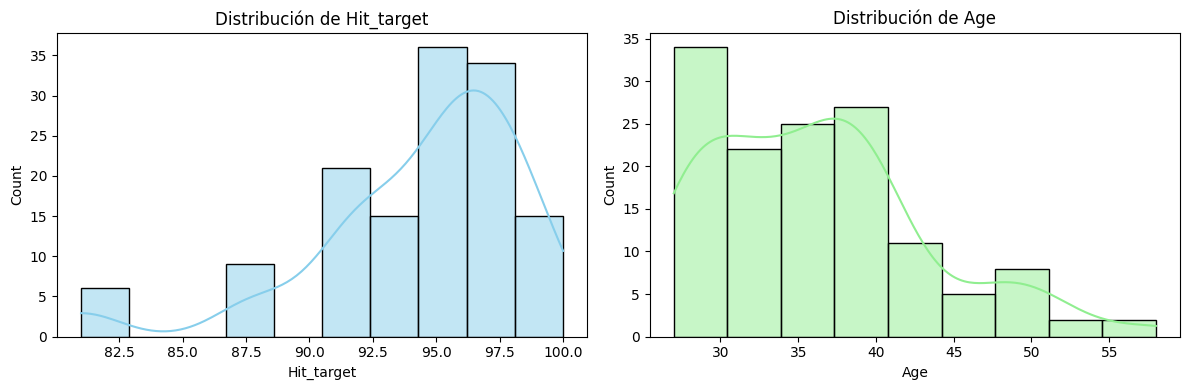

In [242]:
# Visualizaci√≥n de la distribuci√≥n de 'Hit_target' y 'Age'
plt.figure(figsize=(10, 5)) 

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histograma Hit_target
sns.histplot(desempe√±o_profesional['Hit_target'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribuci√≥n de Hit_target')

# Histograma Age
sns.histplot(desempe√±o_profesional['Age'], kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribuci√≥n de Age')

plt.tight_layout()
plt.show()


Ninguna de las dos variables sigue una distribuci√≥n normal.
Si ambos p > 0.05 ‚Üí usa Pearson:
Si alguno p ‚â§ 0.05 ‚Üí usa Spearman:

In [243]:
# Prueba de normalidad de Shapiro-Wilk para las columnas 'Hit_target' y 'Age'

# Shapiro para Hit_target
stat1, p1 = shapiro(desempe√±o_profesional['Hit_target'])
print(f"Hit_target - Shapiro p-value: {p1:.4f}")

# Shapiro para Age
stat2, p2 = shapiro(desempe√±o_profesional['Age'])
print(f"Age - Shapiro p-value: {p2:.4f}")


Hit_target - Shapiro p-value: 0.0000
Age - Shapiro p-value: 0.0000


## Spearman‚Äôs Rank Correlation Coefficient
Este test no asume normalidad y detecta relaciones mon√≥tonas (creciente o decreciente, no necesariamente lineal).

## No hay evidencia estad√≠sticamente significativa de una relaci√≥n entre la edad del empleado y su nivel de cumplimiento de objetivos

In [244]:
from scipy.stats import spearmanr
r, p = spearmanr(desempe√±o_profesional['Hit_target'], desempe√±o_profesional['Age'])
print(f"Spearman rho = {r:.3f}, p-value = {p:.4f}")

# Visualizaci√≥n de la relaci√≥n entre 'Hit_target' y 'Age'
plt.figure(figsize=(8, 6))      
sns.scatterplot(x='Age', y='Hit_target', data=desempe√±o_profesional, color='purple')
plt.title('Relaci√≥n entre Edad y Desempe√±o (Hit_target)')   
plt.xlabel('Edad')
plt.ylabel('Desempe√±o (Hit_target)')
plt.axhline(y=0, color='red', linestyle='--')  # L√≠nea horizontal en y=0
plt.axvline(x=0, color='red', linestyle='--')  # L√≠nea vertical en x=0
plt.grid(True)
plt.show()  # Muestra el gr√°fico


Spearman rho = 0.035, p-value = 0.6838


## Distribucion de Hit_target por social drinker (variable numerica y variable binaria) 

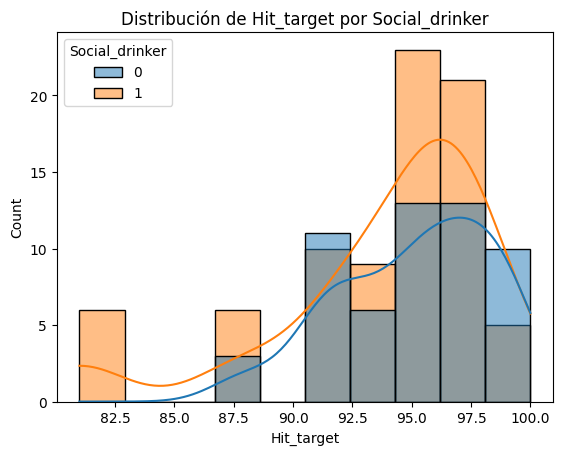

In [245]:
# Histograma
sns.histplot(data=desempe√±o_profesional, x="Hit_target", hue="Social_drinker", kde=True)
plt.title("Distribuci√≥n de Hit_target por Social_drinker")
plt.show()

In [246]:
for group in [0, 1]:
    data = desempe√±o_profesional[desempe√±o_profesional['Social_drinker'] == group]['Hit_target']
    stat, p = shapiro(data)
    print(f"Grupo {group} - Shapiro-Wilk p-value: {p:.4f}")


Grupo 0 - Shapiro-Wilk p-value: 0.0044
Grupo 1 - Shapiro-Wilk p-value: 0.0000


## No hay evidencia estad√≠sticamente significativa de una relaci√≥n entre social_drinker del empleado y su nivel de cumplimiento de objetivos

Prueba mannwhitneyu: U = 2518.00, p-value = 0.2169


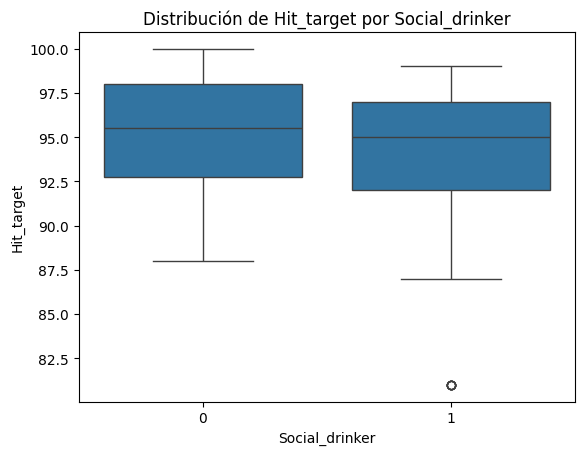

In [247]:
grupo_0 = desempe√±o_profesional[desempe√±o_profesional['Social_drinker'] == 0]['Hit_target']
grupo_1 = desempe√±o_profesional[desempe√±o_profesional['Social_drinker'] == 1]['Hit_target']

stat, p = mannwhitneyu(grupo_0, grupo_1, alternative='two-sided')
print(f"Prueba mannwhitneyu: U = {stat:.2f}, p-value = {p:.4f}")

# Visualizaci√≥n de la distribuci√≥n de Hit_target por Social_drinker
sns.boxplot(x='Social_drinker', y='Hit_target', data=desempe√±o_profesional)
plt.title("Distribuci√≥n de Hit_target por Social_drinker")
plt.xlabel("Social_drinker")
plt.ylabel("Hit_target")
plt.show()


## Distribucion de Hit_target por Son (2 variables numericas) 

Este gr√°fico (boxplot) muestra c√≥mo var√≠a el desempe√±o seg√∫n n√∫mero de hijos y si hay diferencias claras entre los grupos.

<Figure size 1000x500 with 0 Axes>

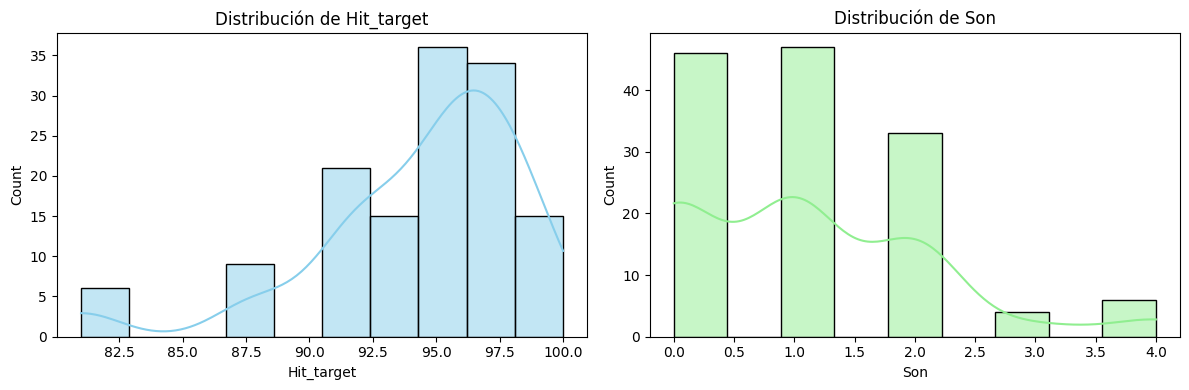

In [248]:
# Visualizaci√≥n de la distribuci√≥n de 'Hit_target' y 'Social_drinker'

sns.boxplot(data=desempe√±o_profesional, x='Son', y='Hit_target')
plt.title('Distribuci√≥n de Hit_target seg√∫n n√∫mero de hijos')
plt.show()

# Visualizaci√≥n de la distribuci√≥n de 'Hit_target' y 'Son'
plt.figure(figsize=(10, 5))
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Histograma Hit_target
sns.histplot(desempe√±o_profesional['Hit_target'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribuci√≥n de Hit_target')
# Histograma Son
sns.histplot(desempe√±o_profesional['Son'], kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribuci√≥n de Son')    
plt.tight_layout()
plt.show()


| N√∫mero de hijos (`Son`) | p-value | ¬øDistribuci√≥n normal? |
| ----------------------- | ------- | --------------------- |
| 0                       | 0.0001  | ‚ùå No                  |
| 1                       | 0.0000  | ‚ùå No                  |
| 2                       | 0.0131  | ‚ùå No                  |
| 3                       | 0.1170  | ‚úÖ S√≠                  |
| 4                       | 0.0070  | ‚ùå No                  |

Si hubiese normalidad podr√≠a usar anova

In [249]:
for hijos in sorted(desempe√±o_profesional['Son'].unique()):
    grupo = desempe√±o_profesional[desempe√±o_profesional['Son'] == hijos]['Hit_target']
    stat, p = shapiro(grupo)
    print(f'Son = {hijos} ‚Üí Shapiro p-value = {p:.4f}')


Son = 0 ‚Üí Shapiro p-value = 0.0001
Son = 1 ‚Üí Shapiro p-value = 0.0000
Son = 2 ‚Üí Shapiro p-value = 0.0131
Son = 3 ‚Üí Shapiro p-value = 0.1170
Son = 4 ‚Üí Shapiro p-value = 0.0070


Kruskal-Wallis
Este test no param√©trico compara si hay diferencias en la distribuci√≥n de Hit_target entre los distintos grupos de Son, sin asumir normalidad.

## no hay evidencia estad√≠sticamente significativa de que Hit_target (desempe√±o) var√≠e seg√∫n el n√∫mero de hijos (Son).

In [250]:
from scipy.stats import kruskal

grupo_0 = desempe√±o_profesional[desempe√±o_profesional['Son'] == 0]['Hit_target']
grupo_1 = desempe√±o_profesional[desempe√±o_profesional['Son'] == 1]['Hit_target']
grupo_2 = desempe√±o_profesional[desempe√±o_profesional['Son'] == 2]['Hit_target']
grupo_3 = desempe√±o_profesional[desempe√±o_profesional['Son'] == 3]['Hit_target']
grupo_4 = desempe√±o_profesional[desempe√±o_profesional['Son'] == 4]['Hit_target']

stat, p = kruskal(grupo_0, grupo_1, grupo_2, grupo_3, grupo_4)
print(f'Kruskal-Wallis H = {stat:.4f}, p-value = {p:.4f}')


Kruskal-Wallis H = 2.6497, p-value = 0.6180


## Distribucion de Hit_target por Education (2 variables numericas) 

In [251]:
# Muestra los valores √∫nicos en la columna 'Education'
valores_unicos_education = desempe√±o_profesional['Education'].unique()
print("Valores √∫nicos en Education:", valores_unicos_education)

Valores √∫nicos en Education: [3 1 2]


In [252]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Education', y='Hit_target', data=desempe√±o_profesional)
plt.title('Distribuci√≥n de Hit_target seg√∫n nivel educativo')
plt.show()


In [253]:
for nivel in sorted(desempe√±o_profesional['Education'].unique()):
    grupo = desempe√±o_profesional[desempe√±o_profesional['Education'] == nivel]['Hit_target']
    stat, p = shapiro(grupo)
    print(f'Education = {nivel} ‚Üí Shapiro p-value = {p:.4f}')


Education = 1 ‚Üí Shapiro p-value = 0.0000
Education = 2 ‚Üí Shapiro p-value = 0.8207
Education = 3 ‚Üí Shapiro p-value = 0.4188


In [254]:
grupo_1 = desempe√±o_profesional[desempe√±o_profesional['Education'] == 1]['Hit_target']
grupo_2 = desempe√±o_profesional[desempe√±o_profesional['Education'] == 2]['Hit_target']
grupo_3 = desempe√±o_profesional[desempe√±o_profesional['Education'] == 3]['Hit_target']

stat, p = kruskal(grupo_1, grupo_2, grupo_3)
print(f'Kruskal-Wallis H = {stat:.4f}, p-value = {p:.4f}')


Kruskal-Wallis H = 0.3365, p-value = 0.8451


## Como el p-value = 0.8451 > 0.05, no hay evidencia estad√≠sticamente significativa de que el nivel educativo (Education) est√© asociado con diferencias en el desempe√±o (Hit_target).

## Distribucion de Hit_target por Distance_Residence_Work (2 variables numericas) 

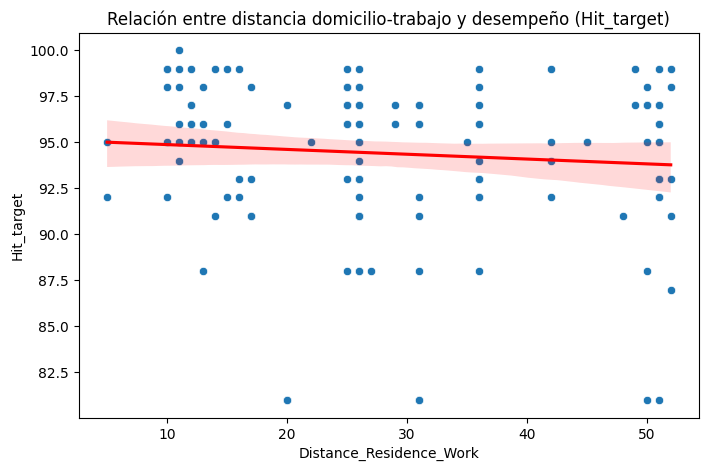

In [255]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Distance_Residence_Work', y='Hit_target', data=desempe√±o_profesional)
sns.regplot(x='Distance_Residence_Work', y='Hit_target', data=desempe√±o_profesional, scatter=False, color='red')
plt.title('Relaci√≥n entre distancia domicilio-trabajo y desempe√±o (Hit_target)')
plt.show()


no hay normalidad

In [256]:
shapiro_hit = shapiro(desempe√±o_profesional['Hit_target'])
shapiro_dist = shapiro(desempe√±o_profesional['Distance_Residence_Work'])

print(f'Hit_target ‚Üí Shapiro p-value = {shapiro_hit.pvalue:.4f}')
print(f'Distance_Residence_Work ‚Üí Shapiro p-value = {shapiro_dist.pvalue:.4f}')


Hit_target ‚Üí Shapiro p-value = 0.0000
Distance_Residence_Work ‚Üí Shapiro p-value = 0.0000


Correlaci√≥n de Spearman
Este test no requiere normalidad y mide la relaci√≥n mon√≥tona entre dos variables ordinales o continuas.

In [257]:

rho, pval = spearmanr(desempe√±o_profesional['Hit_target'], desempe√±o_profesional['Distance_Residence_Work'])
print(f"Spearman rho = {rho:.4f}, p-value = {pval:.4f}")


Spearman rho = -0.1199, p-value = 0.1644


 Interpretaci√≥n
No hay evidencia estad√≠sticamente significativa de que exista una relaci√≥n entre:

üîπ Distance_Residence_Work (distancia del hogar al trabajo)
üîπ y Hit_target (desempe√±o laboral)

en tu conjunto de datos.

üìå Conclusi√≥n pr√°ctica:
La distancia entre la residencia y el trabajo no parece afectar el desempe√±o medido por Hit_target.

Puedes considerar excluir esta variable si est√°s buscando predecir o explicar el desempe√±o.

## Distribucion de Hit_target por Social_smoker (variable numerica y binaria) 

In [258]:
# Histograma
sns.histplot(data=desempe√±o_profesional, x="Hit_target", hue="Social_smoker", kde=True)
plt.title("Distribuci√≥n de Hit_target por Social_smoker")
plt.show()

In [259]:
for group in [0, 1]:
    data = desempe√±o_profesional[desempe√±o_profesional['Social_smoker'] == group]['Hit_target']
    stat, p = shapiro(data)
    print(f"Grupo {group} - Shapiro-Wilk p-value: {p:.4f}")


Grupo 0 - Shapiro-Wilk p-value: 0.0000
Grupo 1 - Shapiro-Wilk p-value: 0.4087


no hay normalidad 

Prueba mannwhitneyu: U = 591.00, p-value = 0.8671


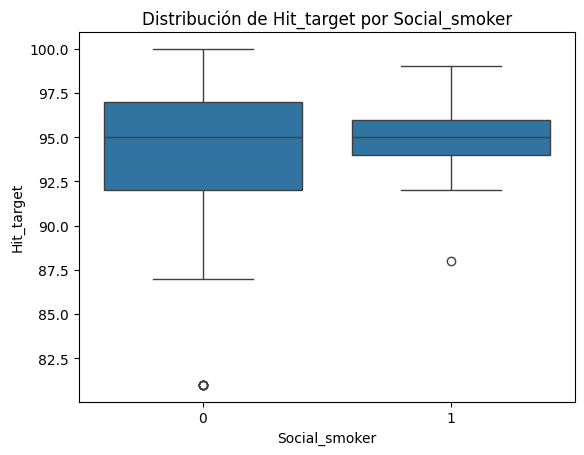

In [260]:
grupo_0 = desempe√±o_profesional[desempe√±o_profesional['Social_smoker'] == 0]['Hit_target']
grupo_1 = desempe√±o_profesional[desempe√±o_profesional['Social_smoker'] == 1]['Hit_target']

stat, p = mannwhitneyu(grupo_0, grupo_1, alternative='two-sided')
print(f"Prueba mannwhitneyu: U = {stat:.2f}, p-value = {p:.4f}")

# Visualizaci√≥n de la distribuci√≥n de Hit_target por Social_smoker
sns.boxplot(x='Social_smoker', y='Hit_target', data=desempe√±o_profesional)
plt.title("Distribuci√≥n de Hit_target por Social_smoker")
plt.xlabel("Social_smoker")
plt.ylabel("Hit_target")
plt.show()


no hay evidencia de que exista correlaci√≥n significativa con Social_smoker

## Distribucion de Hit_target por Service_time (2 variables numericas) 

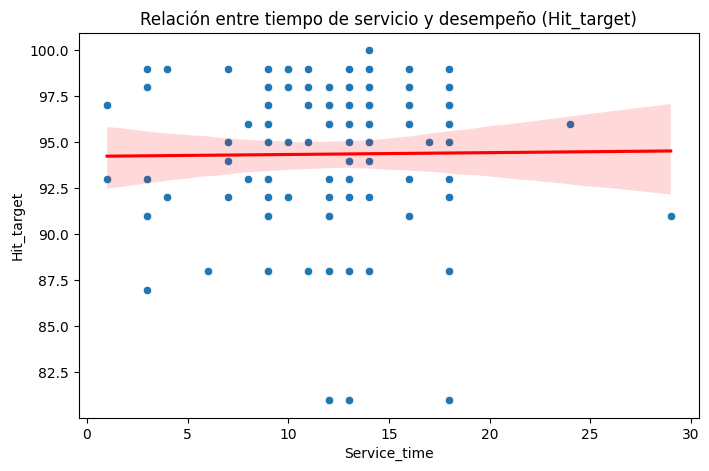

In [261]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Service_time', y='Hit_target', data=desempe√±o_profesional)
sns.regplot(x='Service_time', y='Hit_target', data=desempe√±o_profesional, scatter=False, color='red')
plt.title('Relaci√≥n entre tiempo de servicio y desempe√±o (Hit_target)')
plt.show()

In [262]:
shapiro_hit = shapiro(desempe√±o_profesional['Hit_target'])
shapiro_dist = shapiro(desempe√±o_profesional['Service_time'])

print(f'Hit_target ‚Üí Shapiro p-value = {shapiro_hit.pvalue:.4f}')
print(f'Service_time ‚Üí Shapiro p-value = {shapiro_dist.pvalue:.4f}')


Hit_target ‚Üí Shapiro p-value = 0.0000
Service_time ‚Üí Shapiro p-value = 0.0001


no normalidad

In [263]:
rho, pval = spearmanr(desempe√±o_profesional['Hit_target'], desempe√±o_profesional['Service_time'])
print(f"Spearman rho = {rho:.4f}, p-value = {pval:.4f}")

Spearman rho = 0.0558, p-value = 0.5186


dejar hasta aqui